https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### Imports

In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Functions

In [39]:
def create_dataset(N,a,b,x,y):
    X = np.random.random((N,2))*x - y
    Y = np.cos(a*X[:,0]) + np.cos(b*X[:,1])
    
    return X,Y

def plot_dataset(X,Y):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    ax.scatter(X[:,0],X[:,1],Y);
    # plot in jupyter is less flexible to play with and rotate
#     plt.show()


def to_torch(X,reshape=False):
    if reshape: 
        return torch.from_numpy(X.astype(np.float32).reshape(-1,1))
    else:
        return torch.from_numpy(X.astype(np.float32))
    

def create_model_and_train(X_train,Y_train,n_epochs=1000):
    
    model = nn.Sequential(
        nn.Linear(2,128),
        nn.ReLU(),
        nn.Linear(128,1)
    )
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
    
    inputs  = to_torch(X_train,reshape=False)
    targets = to_torch(Y_train,reshape=True)
    
    
    
    train_losses = np.zeros(n_epochs)
    
    
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        train_losses[it]=loss.item()
        
        loss.backward()
        optimizer.step()
        
        
        if it%100==0:
            print("{:20}".format(f"epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}"))
        
    return model ,train_losses


def plot_metric(data, metric):
    plt.plot(data, label=f"train {metric}")
    plt.legend()
    plt.show
    
    
def pred_final_plot(model,X,Y,a=-3,b=3):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    ax.scatter(X[:,0],X[:,1],Y);
    
    with torch.no_grad():
        line = np.linspace(a,b,50)
        xx,yy = np.meshgrid(line, line)
        Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
        Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
        Yhat = model(Xgrid_torch).numpy().flatten()
        ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
        plt.show()
        

### Create dataset

In [24]:
X,Y = create_dataset(N=1000,a=2,b=3,x=6,y=3)

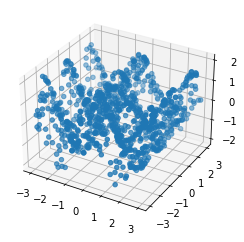

In [25]:
plot_dataset(X,Y)

### Create and train model

In [31]:
model ,train_losses = create_model_and_train(X,Y,n_epochs=1000)

epoch 1/1000, Train Loss: 1.0336
epoch 101/1000, Train Loss: 0.3296
epoch 201/1000, Train Loss: 0.1010
epoch 301/1000, Train Loss: 0.0125
epoch 401/1000, Train Loss: 0.0048
epoch 501/1000, Train Loss: 0.0037
epoch 601/1000, Train Loss: 0.0029
epoch 701/1000, Train Loss: 0.0026
epoch 801/1000, Train Loss: 0.0032
epoch 901/1000, Train Loss: 0.0023


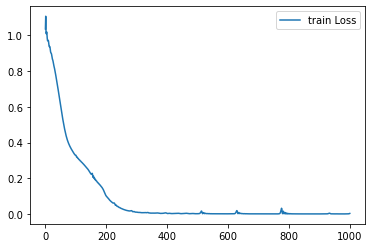

In [33]:
plot_metric(train_losses, "Loss")

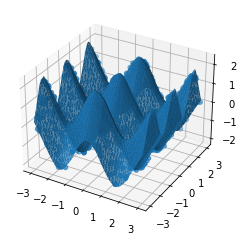

In [40]:
pred_final_plot(model,X,Y)

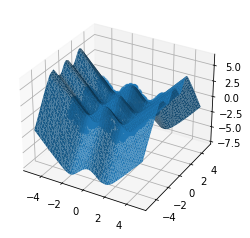

In [42]:
# Can NN extrapolate?
pred_final_plot(model,X,Y,-5,5)